# TP 2 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [1]:
# Imports iniciales
%matplotlib inline
import math
from common import *
from ann import *
from sklearn.model_selection import KFold
from itertools import product

--------------------------------------------------------------------------------
## Ejercicio 1

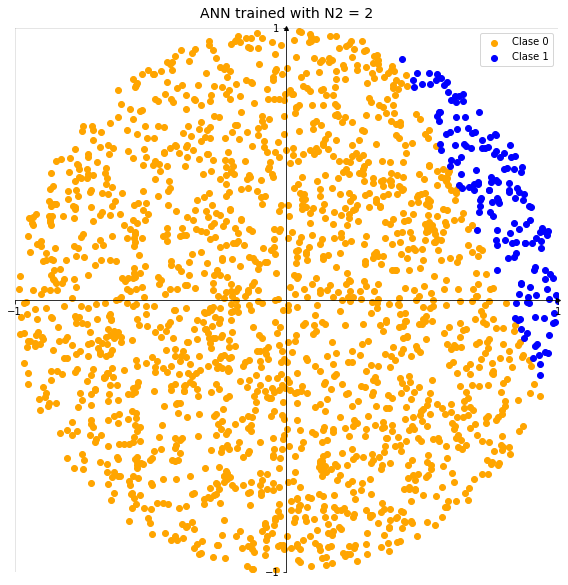

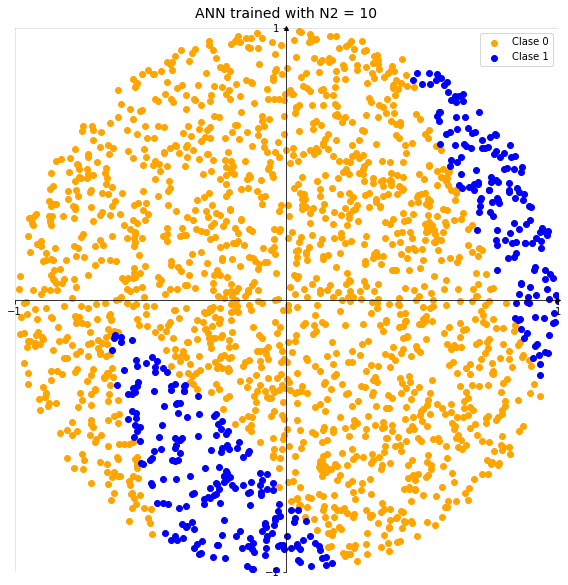

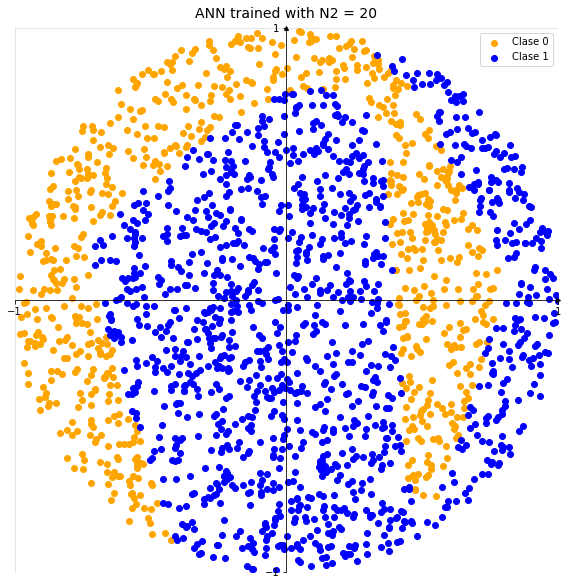

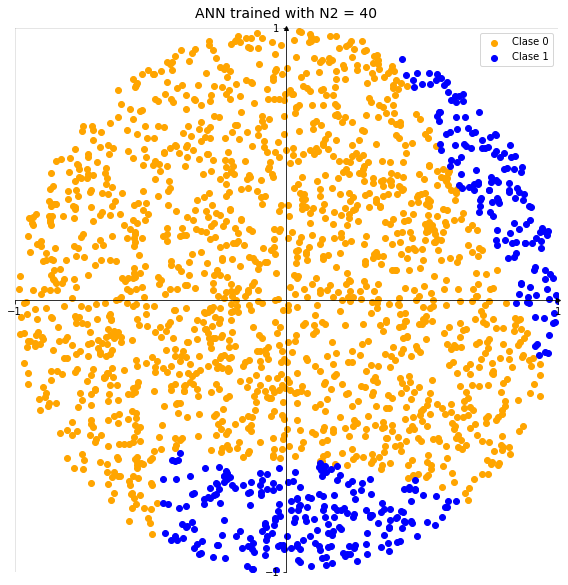

In [2]:
# Valores utilizados para crear la red neuronal
epochs=20 # numero de epocas que entrena cada vez
eta=0.1 # learning rate
alfa=0.9 # momentum
evals=1000 # evalauciones del entrenamiento

# Creo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = generate_spirals(600)
# Separo un 20% al azar para conjunto de validación
kf = KFold(n_splits = 5, shuffle = True)
result = next(kf.split(df_data_spirals), None)
df_train_spirals = df_data_spirals.iloc[result[0]]
df_val_spirals = df_data_spirals.iloc[result[1]]

# Genero el conjunto de test
df_test_spirals = generate_spirals(2000)

# Separo los conjuntos de entrenamiento, validación y test en conjuntos
# de datos de entrada y con las respuestas.
X_train, y_train = df_train_spirals[[0, 1]], df_train_spirals['Class']
X_val, y_val = df_val_spirals[[0, 1]], df_val_spirals['Class']
X_test, y_test = df_test_spirals[[0, 1]], df_test_spirals['Class']

# Itero para cada cantidad de neuronas en la capa intermedia
for N2 in [2, 10, 20, 40]:
  # Creo la red neuronal
  classif = create_net_classifier(N2, eta, alfa, epochs)

  # La entreno con los conjuntos generados anteriormente
  best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
  
  # Predigo sobre el conjunto de test
  predict_test = best_net.predict(X_test)
  df_predict = df_test_spirals.copy(deep = True)
  df_predict['Class'] = predict_test

  # Grafico los resultados
  graph_df(df_predict, "ANN trained with N2 = {0}".format(N2))

### Conclusiones
A

--------------------------------------------------------------------------------
## Ejercicio 2

In [3]:
# Ejercicio 2
# Valores utilizados para crear la red neuronal
epochs=50 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=300 # evalauciones del entrenamiento
etas=[0.1, 0.01, 0.001] # learning rate
alfas=[0, 0.5, 0.9] # momentum

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/dos_elipses.data", header=None, names = [0, 1, 'Class'])
# Separo un 20% al azar para conjunto de validación
kf = KFold(n_splits = 5, shuffle = True)
result = next(kf.split(df_data_elipses), None)
df_train_elipses = df_data_elipses.iloc[result[0]]
df_val_elipses = df_data_elipses.iloc[result[1]]

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/dos_elipses.test", header=None, names = [0, 1, 'Class'])

# Separo los conjuntos de entrenamiento, validación y test en conjuntos
# de datos de entrada y con las respuestas.
X_train, y_train = df_train_elipses[[0, 1]], df_train_elipses['Class']
X_val, y_val = df_val_elipses[[0, 1]], df_val_elipses['Class']
X_test, y_test = df_test_elipses[[0, 1]], df_test_elipses['Class']

best_mean_test_error = math.inf
errors = np.array([])

table = []

# Itero para cada combinación de learning rate y momentum
for (eta, alfa) in [(e, a) for e in etas for a in alfas]:
  train_errors = []
  val_errors = []
  test_errors = []

  # Para cada combinación realizo 10 entrenamientos iguales
  for i in range(10):
    # Creo la red neuronal
    classif = create_net_classifier(N2, eta, alfa, epochs)
  
    # La entreno con los conjuntos generados anteriormente
    best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

    # Junto todos los errores en listas 2d donde hay una fila por cada una de las
    # 10 redes y las columnas son los errores por etapa
    train_errors.append(e_train)
    val_errors.append(e_val)
    test_errors.append(e_test)

  train_errors = np.asarray(train_errors)
  val_errors = np.asarray(val_errors)
  test_errors = np.asarray(test_errors)
  
  # Calculo los promedios de los errores por cada etapa (columna)
  mean_train_errors = train_errors.mean(axis = 0)
  mean_val_errors = val_errors.mean(axis = 0)
  mean_test_errors = test_errors.mean(axis = 0)

  # Busco el mínimo error de validación (y su índice) entre los promedios por cada etapa
  min_val_error = np.min(mean_val_errors)
  index_min_val_error = np.where(mean_val_errors == min_val_error)[0][0]

  # Para la etapa del mínimo error de validación busco su error de test
  mean_min_test_error = mean_test_errors[index_min_val_error]

  # Si es el mínimo error de test hasta ahora lo guardo junto a su eta, alfa
  # y datos de errores correspondientes
  if mean_min_test_error < best_mean_test_error:
    best_mean_test_error = mean_min_test_error
    best_eta = eta
    best_alfa = alfa
    # Guardo estos errores para graficarlos luego
    best_train_errors = np.copy(mean_train_errors)
    best_val_errors = np.copy(mean_val_errors)
    best_test_errors = np.copy(mean_test_errors)

  # Guardo la combinación eta, alfa con su error de test calculado antes
  table.append([eta, alfa, mean_min_test_error])

ej3_errors_table = pd.DataFrame(table, columns = ["Learning rate", "Momentum", "Mean test error"])
print("Best eta: {0} best alfa: {1} with mean test error: {2}".format(best_eta, best_alfa, best_mean_test_error))
ej3_errors_table

Best eta: 0.01 best alfa: 0.9 with mean test error: 0.035699999999999996


,Learning rate,Momentum,Mean test error
0,0.100,0.0,0.04185
1,0.100,0.5,0.05765
2,0.100,0.9,0.06135
3,0.010,0.0,0.23455
4,0.010,0.5,0.19545
5,0.010,0.9,0.03570
6,0.001,0.0,0.24350
7,0.001,0.5,0.24350
8,0.001,0.9,0.23875


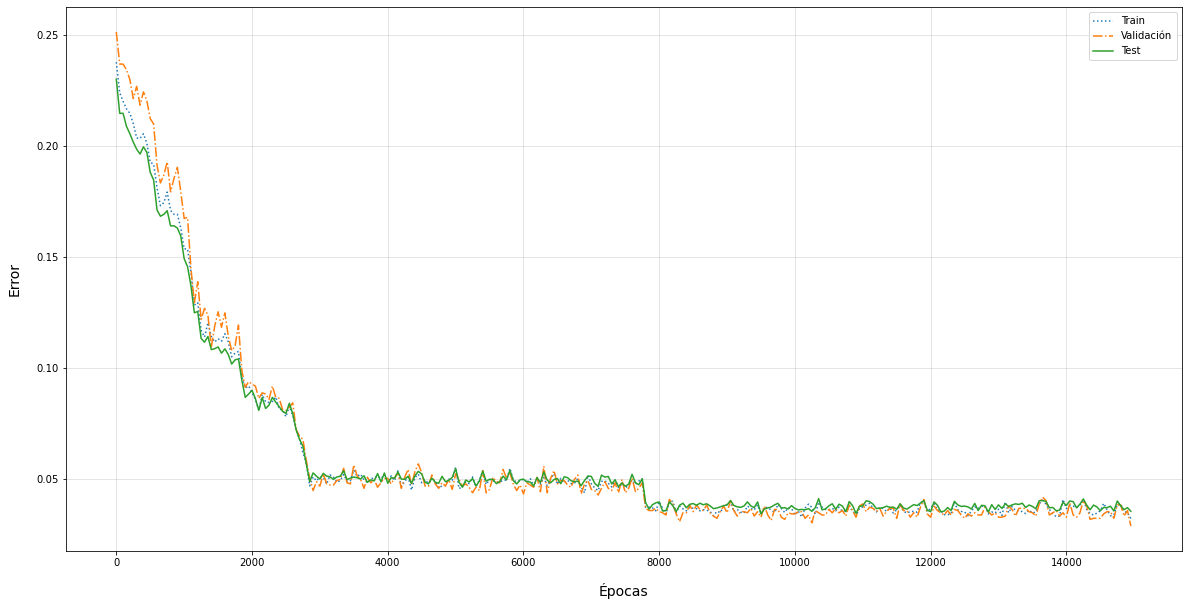

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
xrange = [i * epochs for i in range(evals)]
plt.plot(xrange, best_train_errors, label="Train", linestyle=":")
plt.plot(xrange, best_val_errors, label="Validación", linestyle="-.")
plt.plot(xrange, best_test_errors, label="Test", linestyle="-")
plt.xlabel('Épocas', size=14, labelpad=15)
plt.ylabel('Error', size=14, labelpad=15)
plt.legend()
plt.show()

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 3

In [ ]:
# # Ejercicio 3
# # Valores utilizados para crear la red neuronal
# epochs=50 # numero de epocas que entrena cada vez
# N2=30  # neuronas en la capa oculta
# evals=400 # evalauciones del entrenamiento
# eta=0.01 # learning rate
# alfa=0.9 # momentum
# 
# # Leo el conjunto de datos utilizado para entrenar y vaidar
# df_data_ikeda = pd.read_csv("datasets/ikeda.data", header=None, names = [0, 1, 'Class'])
# # Leo el conjunto de test
# df_test_ikeda = pd.read_csv("datasets/ikeda.test", header=None, names = [0, 1, 'Class'])
# 
# 
# for folds in [20, 4, 2]:
#   # Separo al azar para conjunto de validación
#   kf = KFold(n_splits = folds, shuffle = True)
#   result = next(kf.split(df_data_ikeda), None)
#   df_train_ikeda = df_data_ikeda.iloc[result[0]]
#   df_val_ikeda = df_data_ikeda.iloc[result[1]]
# 
#   # Separo los conjuntos de entrenamiento, validación y test en conjuntos
#   # de datos de entrada y con las respuestas.
#   X_train, y_train = df_train_ikeda[[0, 1]], df_train_ikeda['Class']
#   X_val, y_val = df_val_ikeda[[0, 1]], df_val_ikeda['Class']
#   X_test, y_test = df_test_ikeda[[0, 1]], df_test_ikeda['Class']
# 
#   # Creo la red neuronal
#   classif = create_net_classifier(N2, eta, alfa, epochs)
#   # La entreno con los conjuntos generados anteriormente
#   best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)